# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for weather queries:
weather_query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# the lists to be used in the dataframe:
city_names = []
countries = []
dates = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
cloudiness = []
humidities = []

# Counting variables for query loop:
record_count = 0
set_count = 1

# Loop that creates dataframe's columns:
for city in cities:
    try:
        response = requests.get(weather_query_url + city.replace(" ", "&")).json()
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        wind_speeds.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        # Print log:
        if record_count > 48:
            record_count = 1
            set_count += 1
            city_names.append(city)
        else:
            record_count += 1
            city_names.append(city)
            print(f'Processing Record {record_count} of Set {set_count} | {city}')
    except:
        print('City not found. Skipping...')
print('----------Data Retrieval Complete----------')            

City not found. Skipping...
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | kungurtug
Processing Record 5 of Set 1 | alta floresta
Processing Record 6 of Set 1 | mandalgovi
Processing Record 7 of Set 1 | susanino
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | tamandare
Processing Record 10 of Set 1 | mekhe
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | ouegoa
Processing Record 13 of Set 1 | chumikan
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Set 1 | tadpatri
Processing Record 23 of Set 1 | chegutu
Processing Record 24 o

Processing Record 46 of Set 4 | catarina
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | saskylakh
Processing Record 2 of Set 5 | bocas del toro
Processing Record 3 of Set 5 | cape town
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | jamkhandi
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | itaituba
Processing Record 8 of Set 5 | hilo
Processing Record 9 of Set 5 | potosi
Processing Record 10 of Set 5 | laguna
Processing Record 11 of Set 5 | teya
Processing Record 12 of Set 5 | kamyshin
Processing Record 13 of Set 5 | tanout
Processing Record 14 of Set 5 | rosetta
Processing Record 15 of Set 5 | kahului
Processing Record 16 of Set 5 | hithadhoo
Processing Record 17 of Set 5 | ust-maya
Processing Record 18 of Set 5 | rantepao
Processing Record 19 of Set 5 | porto walter
Processing Record 20 of Set 5 | pringsewu
Processing Record 21 of Set 5 | tamiahua
City not found.

Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | bilma
Processing Record 39 of Set 8 | atar
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | abha
Processing Record 42 of Set 8 | lazaro cardenas
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | cape elizabeth
Processing Record 45 of Set 8 | beringovskiy
Processing Record 46 of Set 8 | abbeville
Processing Record 47 of Set 8 | tinos
Processing Record 48 of Set 8 | mawlaik
Processing Record 49 of Set 8 | arkhara
Processing Record 2 of Set 9 | dunedin
Processing Record 3 of Set 9 | hastings
Processing Record 4 of Set 9 | scarborough
Processing Record 5 of Set 9 | hay river
Processing Record 6 of Set 9 | gazojak
Processing Record 7 of Set 9 | sarangani
Processing Record 8 of Set 9 | tual
Processing Record 9 of Set 9 | lahij
Processing Record 10 of Set 9 | tevaitoa
Processing Record 11 of Set 9 | clyde river
Processing Record 12 of Set 9 | waiouru
Processing Record 13 of Set 9 |

Processing Record 31 of Set 12 | banjar
City not found. Skipping...
Processing Record 32 of Set 12 | nuuk
Processing Record 33 of Set 12 | svetlogorsk
Processing Record 34 of Set 12 | tarko-sale
Processing Record 35 of Set 12 | pryyutivka
Processing Record 36 of Set 12 | tabou
Processing Record 37 of Set 12 | westport
Processing Record 38 of Set 12 | litoral del san juan
Processing Record 39 of Set 12 | sanok
Processing Record 40 of Set 12 | kumluca
Processing Record 41 of Set 12 | wuning
Processing Record 42 of Set 12 | seymchan
----------Data Retrieval Complete----------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# A weather dictionary of lists for dataframe:
weather_dictionary = {
    "City":city_names,
    "Country":countries,
    "Date":dates,
    "Lat.":latitudes,
    "Lon.":longitudes,
    "Max Temp.":max_temps,
    "Wind Speed":wind_speeds,
    "Cloudiness":cloudiness,
    "Humidity":humidities
}

In [5]:
# Convert data into dataframe:
weather_df = pd.DataFrame(weather_dictionary)
# Displaying top five rows of dataframe:
weather_df.head()

,City,Country,Date,Lat.,Lon.,Max Temp.,Wind Speed,Cloudiness,Humidity
0,kodiak,US,1615676441,57.7900,-152.4072,33.80,18.41,1,29
1,albany,US,1615676184,42.6001,-73.9662,37.99,6.11,41,28
2,ribeira grande,ES,1615676442,42.7461,-8.4439,48.20,4.61,75,87
3,kungurtug,RU,1615676442,50.5994,97.5228,-0.29,15.10,100,61
4,alta floresta,NO,1615676442,69.9689,23.2717,24.01,2.30,90,93


In [7]:
# Output dataframe as CSV file (for use in VacationPy)
weather_df.to_csv('weather_df_csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Step skipped. After looking at Latitude vs. Humidity scatter plot, no cities were above 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

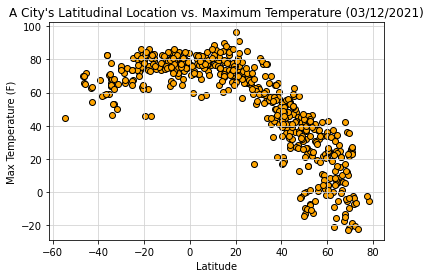

In [9]:
plt.scatter(weather_df["Lat."], weather_df["Max Temp."], edgecolors = "black", facecolors = "orange")
plt.title("A City's Latitudinal Location vs. Maximum Temperature (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.savefig("dataplots/lat_v_temp.png")
plt.show()

## Latitude vs. Humidity Plot

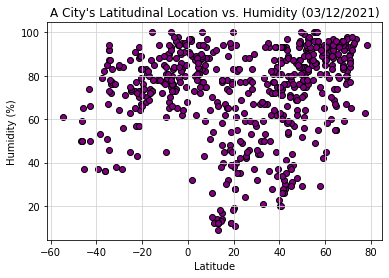

In [10]:
plt.scatter(weather_df["Lat."], weather_df["Humidity"], edgecolors = "black", facecolors = "purple")
plt.title("A City's Latitudinal Location vs. Humidity (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.savefig("dataplots/lat_v_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

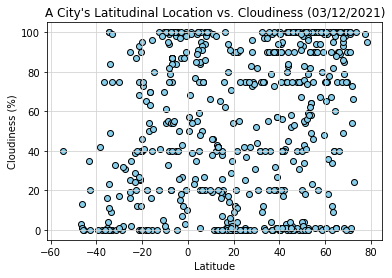

In [11]:
plt.scatter(weather_df["Lat."], weather_df["Cloudiness"], edgecolors = "black", facecolors = "skyblue")
plt.title("A City's Latitudinal Location vs. Cloudiness (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.savefig("dataplots/lat_v_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

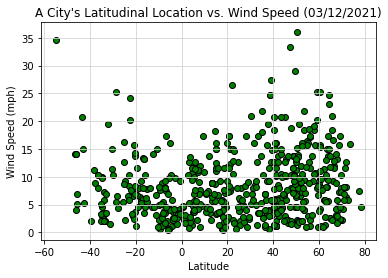

In [12]:
plt.scatter(weather_df["Lat."], weather_df["Wind Speed"], edgecolors = "black", facecolors = "green")
plt.title("A City's Latitudinal Location vs. Wind Speed (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.savefig("dataplots/lat_v_wind.png")
plt.show()

## Linear Regression

In [13]:
# Northern and Southern Hemisphere dataframes from weather_df:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat."]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat."]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression